<a href="https://colab.research.google.com/github/gabrielcan/ModeloDeDatosDiabetesPima/blob/main/ModeloDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción del Dataset: **Pima Indians Diabetes Database**

El **Pima Indians Diabetes Database** es un conjunto de datos utilizado para predecir la presencia de diabetes en individuos basándose en diversos factores médicos y de salud. Este dataset contiene información recopilada de mujeres de la comunidad indígena Pima, un grupo con una alta prevalencia de diabetes tipo 2. Los datos han sido utilizados ampliamente en estudios de aprendizaje automático y análisis de datos debido a su relevancia y la claridad de su propósito.



# Objetivo del Dataset

El objetivo principal del dataset es predecir la probabilidad de que una persona desarrolle diabetes tipo 2, utilizando características biométricas y de salud. La variable objetivo (**Outcome**), la cual indica si una persona tiene diabetes (**1**) o no (**0**), es la clave para el modelo de predicción. Las demás características se consideran como variables predictoras o **features**.


# Descripción de los Campos del **Pima Indians Diabetes Database**

### 1. **Pregnancies**
- **Descripción:** Número de veces que la persona ha estado embarazada.  
- **Límite Normal:** No tiene un "límite" específico, pero un número más alto podría reflejar un mayor riesgo asociado con complicaciones en embarazos previos, especialmente en mujeres de edad avanzada.

### 2. **Glucose**
- **Descripción:** Nivel de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa (mg/dL).  
- **Límite Normal:**  
  - **Normal:** Menos de 140 mg/dL.  
  - **Prediabetes (Intolerancia a la glucosa):** 140-199 mg/dL.  
  - **Diabetes:** 200 mg/dL o más.  
  Este valor es clave para identificar la capacidad del cuerpo para metabolizar la glucosa y es uno de los principales indicadores de riesgo de diabetes.

### 3. **BloodPressure**
- **Descripción:** Presión arterial diastólica (mm Hg), que es la presión en las arterias cuando el corazón está en reposo entre latidos.  
- **Límite Normal:**  
  - **Normal:** Menos de 80 mm Hg.  
  - **Hipertensión (nivel 1):** 80-89 mm Hg.  
  - **Hipertensión (nivel 2):** 90 mm Hg o más.  
  Un valor elevado puede ser un factor de riesgo importante para enfermedades cardiovasculares y diabetes.

### 4. **SkinThickness**
- **Descripción:** Grosor del pliegue cutáneo en el triceps (mm).  
- **Límite Normal:** Depende del contexto y de la población específica, pero generalmente valores bajos pueden estar asociados con una mala nutrición, mientras que un valor muy alto podría indicar obesidad.

### 5. **Insulin**
- **Descripción:** Concentración de insulina en plasma a las 2 horas en una prueba de tolerancia a la glucosa (mu U/ml).  
- **Límite Normal:**  
  - **Normal:** Entre 2-25 µU/mL.  
  Un valor elevado podría indicar resistencia a la insulina, lo cual es un factor de riesgo para diabetes tipo 2.

### 6. **BMI (Body Mass Index)**
- **Descripción:** Índice de masa corporal, calculado como el peso en kilogramos dividido entre el cuadrado de la altura en metros.  
- **Límite Normal:**  
  - **Bajo peso:** Menos de 18.5.  
  - **Normal:** 18.5-24.9.  
  - **Sobrepeso:** 25-29.9.  
  - **Obesidad:** 30 o más.  
  Un índice de masa corporal elevado está fuertemente asociado con un mayor riesgo de desarrollar diabetes tipo 2.

### 7. **DiabetesPedigreeFunction**
- **Descripción:** Medida de la predisposición genética a la diabetes, calculada a partir de antecedentes familiares y otros factores.  
- **Límite Normal:** No tiene un "límite" fijo, pero valores más altos indican una mayor predisposición genética al riesgo de diabetes.

### 8. **Age**
- **Descripción:** Edad de la persona en años.  
- **Límite Normal:** No tiene un límite "normal", aunque el riesgo de diabetes tipo 2 aumenta con la edad, especialmente después de los 45 años.

### 9. **Outcome**
- **Descripción:** Variable binaria que indica si la persona tiene diabetes (1) o no (0).  



#Objetivos para éste analisis Inicial

- **Visualizar las relaciones entre las variables para ver como se comportan.**
- **Poder manejar los campos Nan de una forma eficiente**
- **Identificar las variables más importantes para predecir la diabetes.**

#Planteamiento del Problema

Para poder realizar este analisis, primero debemos cargar el dataset, luego realizar un análisis exploratorio de datos para identificar los valores perdidos y las variables más importantes para predecir la diabetes y poder encontrar las relaciones entre ellas.

#Pasos a seguir

- **Cargar el dataset y verificar que esté bien cargado.**
- **Verificar la cantidad de valores perdidos en las columnas seleccionadas.**
- **Reemplazar los valores 0 en las columnas seleccionadas con NaN.**
- **Obtener la edad promedio de los 5 registros con valores NaN en la columna "Age" y reemplazarlos en los 5 campos ("Glucose") con el valor promedio calculado.**
- **Generar un Gráfico con 1 variable**
- **Generar un Gráfico con 2 variables**
- **Generar un Gráfico con mas de 2 variables**



In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from datetime import datetime, timedelta

In [2]:
#Cargamos el archivo que vamos a analizar si estamos con el CSV en el mismo lugar que tenemos el archivo ".ipynb"
#df=pd.read_csv('diabetes.csv')

#Usamos la Url de GitHub para cargar el dataset

df=pd.read_csv('https://raw.githubusercontent.com/gabrielcan/ModeloDeDatosDiabetesPima/refs/heads/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Con el comando "describe()", obtenemos rápidamente esto mostrará el resumen estadístico de todas las columnas numéricas en el dataframe.

In [3]:
df.describe().round(1) #agregamos round(1) para redondear en un decimal los resultados.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,3.8,120.9,69.1,20.5,79.8,32.0,0.5,33.2,0.3
std,3.4,32.0,19.4,16.0,115.2,7.9,0.3,11.8,0.5
min,0.0,0.0,0.0,0.0,0.0,0.0,0.1,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.3,0.2,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.5,32.0,0.4,29.0,0.0
75%,6.0,140.2,80.0,32.0,127.2,36.6,0.6,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.4,81.0,1.0


#Se observan muchas columnas con valores minimos de 0 lo cual tiene poco sentido practico como por ejemplo en los siguientes campos:

    1. Concentracion de plasma de glucosa (Glucose)
    2. Presion arterial diastolica en mm Hg (BloodPressure).
    3. Grosor de piel en triceps en mm (SkinThickness).
    4. Nivel de Insulina (Insulin).
    5. BMI Indice de masa corporal (BMI).


Ahora con info(), observamos la cantidad de null que tenemos en cada columna y el tipo de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Contamos la cantidad de 0 (ceros) que tienen en cada una de las columnas seleccionadas

In [5]:
nun_missing = (df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0).sum()
print(nun_missing)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


Remplazamos los valores con 0 por el valor "nan" en cada una de las columnas seleccionadas.

In [6]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

print(df.isnull().sum()) #Contamos los valores "nan" y mostramos la cantidad en cada columna

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


#Nos centramos primero en la columna "Glucose" del DF y mostramos los registros con valor "nan"

In [7]:
dfnanGlucose=df[df.Glucose.isna()]
dfnanGlucose

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


#Guardamos en una variable los index de los campos que tienen "nan" en campo "Glucose"

In [8]:
indexValoresNanGlucose=list(dfnanGlucose.index)
print(indexValoresNanGlucose)

[75, 182, 342, 349, 502]


#Obtenemos 5 valores con NaN en el campo "Glucose".
#Nos parece que es factible remplazar los valores "nan", por un promedio en el campo "Glucose". Pero dicho promedio lo queremos armar considerando los siguientes puntos:
  
1.   Tomar de los 5 registros que tienen "nana", el campo "Age" (Edad) y sacar  
un promedio de la edades.
2.   Hacemos lo mismos con el campo BMI (indice de masa muscular) y el campo "Bloodpressure" (Presion arterial).
3. Teniendo estos 3 promedios (Age, BMI y Bloodpressure), realizaremos lo siguiente:
  - buscaremos en el DF original, la edad promedio que obtuvimos, la cual la vamos a redondear en 0 decimales para obtener un número entero.
  - con los registros que obtuvimos con la edad promedio, tomaremos solo los que esten dentro del "BMI" promedio que obtuvimos anteriormente, dejando un margen de -5 y +5.
  - por último, con los registros resultantes hacemos un último filtro en el campo "Bloodpressure", usando el valor promedio que obtuvimso en el calculo del punto 2 dejando tambien un margen de -3 y +3.
4. Realizado ya los tres pasos anteriores y con los registros resultantes, avanzaremos en sacar el promedio del campo "Glucose". Valor que usaremos para remplazar los "nan" en dicha columna.  

Hacemos el punto 1 y 2, es decir que sacaremos el promedio de los campos "Age","BMI" y "Bloodpressure"

In [9]:
valorGlucosaNa=df[df.Glucose.isna()] #obtenemos un df que contiene solo los registros con valores "nan" en la columna "Glucose"
valorMedioAge=valorGlucosaNa.Age.mean().round(0) #Sacamos el promedio del campo "Age" usando el df "valorGlucosaNa", redondeando en 0
valorMedioBmi=valorGlucosaNa.BMI.mean().round(0) #Sacamos el promedio del campo "BMI" usando el df "valorGlucosaNa", redondeando en 0
valorMedioBloodpressure=valorGlucosaNa.BloodPressure.mean().round(0) #Sacamos el promedio del campo "Bloodpressure" usando el df "valorGlucosaNa", redondeando en 0

print("Valor Medio BMI: ",valorMedioBmi) #Mostramos el resultado Promedio BMI
print("Valor Medio Age: ",valorMedioAge) #Mostramos el resultado Promedio Age
print("Valor Medio Bloodpressure: ",valorMedioBloodpressure) #Mostramos el resultado Promedio Bloodpressure

Valor Medio BMI:  33.0
Valor Medio Age:  29.0
Valor Medio Bloodpressure:  68.0


#Obtenemos un proemdio de 29 en el campo Edad, 33 como BMI y 68 de Presion Arterial entre los 5 registros con valor NaN en "Glucose".

Ahora, generamos un DataFrame que solo contenga los registros donde "Age" es igual a 29, "BMI" es igual a 33 (+-5) y "BloodPressure" es 68 (+-3)

In [10]:
# Generamos un DataFrame que solo contiene los registros donde "Age" es igual a 29, "BMI" es igual a 33 (+-5) y "BloodPressure" es 68 (+-3)
dfConAge29yConsireaciones = df[(df['Age'] == valorMedioAge) & (df['BMI'] >= valorMedioBmi-5) & (df['BMI'] <= valorMedioBmi+5)&(df['BloodPressure'] >= valorMedioBloodpressure-3) & (df['BloodPressure'] <= valorMedioBloodpressure+3)]

#Mostramos el dataframe Resultante
print("Mostramos DF que cumple con las condiciones indicadas: \n\n",dfConAge29yConsireaciones)




Mostramos DF que cumple con las condiciones indicadas: 

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
168            4    110.0           66.0            NaN      NaN  31.9   
171            6    134.0           70.0           23.0    130.0  35.4   
233            4    122.0           68.0            NaN      NaN  35.0   
296            2    146.0           70.0           38.0    360.0  28.0   

     DiabetesPedigreeFunction  Age  Outcome  
168                     0.471   29        0  
171                     0.542   29        1  
233                     0.394   29        0  
296                     0.337   29        1  


In [11]:
# Calculamos la media de los valores de la columna "Glucose" para los registros que cumplen estas condiciones
valorGlucosaAvg29Age = dfConAge29yConsireaciones['Glucose'].mean()

# Mostramos el valor promedio que obtuvimos
print("\n\n Valor promedio del campo 'Glucose': ",valorGlucosaAvg29Age)




 Valor promedio del campo 'Glucose':  128.0


Reemplazamos los valores NaN en el campo "Glucose" con la media que obtuvimos (128), de los registros que tienen 29 en el campo "Age" y cumplen con las consideraciones de BMI y BloodPressure.

In [12]:
df.Glucose=df.Glucose.fillna(valorGlucosaAvg29Age) #Remplazamos los campos nan del campo "Glucose" por el valor obtenido en la variable "valorGlucosaAvg29Age"


Verifciamos que no tengamos valores NaN en el campo "Glucosa"

In [13]:
df[df.Glucose.isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Confirmamos que los cambios se efectuaron de manera correcta en el campo "Glucose" del DF original.

In [24]:
#Mostramos los valores para confirmar que los valores cambiaron,
#usando la variable que contiene el index de los registros que estaban como "NaN" en el campo "Glucose".

df.loc[indexValoresNanGlucose]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,128.0,48.0,20.0,NaN,24.7,0.140,22,0
182,1,128.0,74.0,20.0,23.0,27.7,0.299,21,0
342,1,128.0,68.0,35.0,NaN,32.0,0.389,22,0
349,5,128.0,80.0,32.0,NaN,41.0,0.346,37,1
502,6,128.0,68.0,41.0,NaN,39.0,0.727,41,1


Observamos los valores "NaN" que tenemos en el campo "BIM"

In [25]:
df[df.BMI.isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
145,0,102.0,75.0,23.0,NaN,NaN,0.572,21,0
371,0,118.0,64.0,23.0,89.0,NaN,1.731,21,0
426,0,94.0,NaN,NaN,NaN,NaN,0.256,25,0
494,3,80.0,NaN,NaN,NaN,NaN,0.174,22,0
522,6,114.0,NaN,NaN,NaN,NaN,0.189,26,0
684,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0


Verificamos que tenemos 11 registros con "NaN"

In [26]:
df[df.BMI.isna()].count()

,0
Pregnancies,11
Glucose,11
BloodPressure,4
SkinThickness,2
Insulin,1
BMI,0
DiabetesPedigreeFunction,11
Age,11
Outcome,11


Mostramos los Valores "NaN" del campo "BloodPressure"

In [ ]:
df[df.BloodPressure.isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Group,Resul_Group
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0,21-30,Sin Diabetes
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1,31-40,Con Diabetes
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0,21-30,Sin Diabetes
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0,21-30,Sin Diabetes
78,0,131.0,NaN,NaN,NaN,43.2,0.270,26,1,21-30,Con Diabetes
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0,21-30,Sin Diabetes
172,2,87.0,NaN,23.0,NaN,28.9,0.773,25,0,21-30,Sin Diabetes
193,11,135.0,NaN,NaN,NaN,52.3,0.578,40,1,41-50,Con Diabetes
222,7,119.0,NaN,NaN,NaN,25.2,0.209,37,0,31-40,Sin Diabetes
261,3,141.0,NaN,NaN,NaN,30.0,0.761,27,1,21-30,Con Diabetes


Contamos 35 registros con valores "NaN" en el campo "BloodPressure", tomando el campo "Glucose", donde vemos que tenemos valores en todos los registros.

In [29]:
df_BloodPressure_Connan=df[df.BloodPressure.isna()]
valorMostrar= df_BloodPressure_Connan['Glucose'].count()
print("Cantidad de regitros con NaN en el campo 'BloodPressure': ",valorMostrar)

Cantidad de regitros con NaN en el campo 'BloodPressure':  35


# Observamos, que tenemos varios registros que tienen entre 2 o mas valores "NaN"

Esta situación, nos lleva pensar que, si tenemos filas que tienen mas de 2 columnas con valores NaN, su recontrucción puede generar que alteremos los resultados o veamos valores incoherentes. Por tal motivo, tomaremos los campos claves de 'BloodPressure', 'SkinThickness' y 'BMI', los cuales considereamos que son útiles para el analisis, pero si mas 2 de éstas columnas estan con valores "NaN" en la misma fila, directamente lo eliminaremos.

In [30]:
# Definimos las columnas que vamos a considerar para la condición de NaN
columnas_de_interes = ['BloodPressure', 'SkinThickness','BMI']

# Eliminar filas donde 3 o más columnas tengan NaN
df_limpio = df[df[columnas_de_interes].isna().sum(axis=1) < 2]

# Mostrar el DataFrame limpio
print(df_limpio)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Campo "BloodPressure" mostramos los registros con valores "NaN" que tiene el mísmo.

In [31]:
df_limpio[df_limpio.BloodPressure.isna()]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
172,2,87.0,NaN,23.0,NaN,28.9,0.773,25,0
357,13,129.0,NaN,30.0,NaN,39.9,0.569,44,1


#Tenemos 2 campos que estan con "NaN" en el campo "BloodPressure".
Consideraciones en éstos campos:

1. Uno es con diabetes y el otro es sin diabetes.
2. Tienen edades muy diferentes (25 y 44 años respectivamente).
3. El BMI (indice de masa corportal) son muy desiguales.

Por estos puntos que mencione, es que vamos a tomar cada caso de manera particular.



# Veremos primero el registro con que tiene el valor 44 en el campo "Age"

Lo que vamos a hacer, para poder agregar un valor coherente en el campo "BloodPressure", sera lo siguiente:

*   Buscaremos en el Df con el que estamos trabajando (df_limpio), registros que tengan en el campo "Age" un valor de 44.
*   Luego, vamos a traer solo los registros que tengan en el campo "Outcome" el valor 1 (Con diabetes).



In [39]:
df_Age44_Diabetes=df_limpio[(df_limpio['Age']==44)&(df_limpio['Outcome']==1)]

df_Age44_Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
254,12,92.0,62.0,7.0,258.0,27.6,0.926,44,1
337,5,115.0,76.0,NaN,NaN,31.2,0.343,44,1
357,13,129.0,83.0,30.0,NaN,39.9,0.569,44,1
592,3,132.0,80.0,NaN,NaN,34.4,0.402,44,1
691,13,158.0,114.0,NaN,NaN,42.3,0.257,44,1


Sacamos el promedio de "BloodPressure", usando "df_Age44_Diabetes" creado con los filtros de "Age" y "Outcome".

Guardaremos en una variable (v_PromBloodPressure) el resultado que obtenemos.

In [34]:
v_PromBloodPressure=df_Age44_Diabetes['BloodPressure'].mean().round(0) #Redondeamos con 0 decimales
print(v_PromBloodPressure) #Mostramos el resultado

83.0


Ahora, vamos a modificar el campo "BloodPressure", con el valor promedio que obtuvimos en el paso anterior, en la fila que corresponde al "NaN" que tiene el valor 44 en el campo "Age".


In [35]:
df_limpio.loc[(df_limpio['BloodPressure'].isna()) & (df_limpio['Age'] == 44), 'BloodPressure'] = v_PromBloodPressure

Mostramos el registro que esta quedando con "NaN" en el campo "BloodPressure".

In [37]:
df_limpio[df_limpio.BloodPressure.isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
172,2,87.0,NaN,23.0,NaN,28.9,0.773,25,0


# Ahora trabajaremos con segundo registro que tiene el valor 25 en el campo Age

En éste caso, repetiremos los filtros pero vamos a sumar otro nuevo, por el siguiente motivo:

* El BMI del registro es de 28.9, lo cual podemos usar como referencia, es decir, no tiene mucho sentido que filtremos por edad y que tengamos casos con un BMI de 20 o 35, para emparejar ésta siutacion, en el DF que crearemos, vamos a tomar un rango de 29,9 +-4.


In [ ]:
df_Age25_SinDiabetes=df_limpio[(df_limpio['Age']==25)&(df_limpio['Outcome']==0)&(df_limpio['BMI']>=28.9-4)&(df_limpio['BMI']<=28.9+4)] #creasmo un df que contenga los registros que cumplan con las 2 condiciones que pusimos
df_Age25_SinDiabetes #Mostramos el DF unuevo

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Group,Resul_Group
172,2,87.0,62.0,23.0,NaN,28.9,0.773,25,0,21-30,Sin Diabetes
210,2,81.0,60.0,22.0,NaN,27.7,0.290,25,0,21-30,Sin Diabetes
257,2,114.0,68.0,22.0,NaN,28.7,0.092,25,0,21-30,Sin Diabetes
313,3,113.0,50.0,10.0,85.0,29.5,0.626,25,0,21-30,Sin Diabetes
331,2,87.0,58.0,16.0,52.0,32.7,0.166,25,0,21-30,Sin Diabetes
383,1,90.0,62.0,18.0,59.0,25.1,1.268,25,0,21-30,Sin Diabetes
395,2,127.0,58.0,24.0,275.0,27.7,1.600,25,0,21-30,Sin Diabetes
497,2,81.0,72.0,15.0,76.0,30.1,0.547,25,0,21-30,Sin Diabetes
520,2,68.0,70.0,32.0,66.0,25.0,0.187,25,0,21-30,Sin Diabetes
551,3,84.0,68.0,30.0,106.0,31.9,0.591,25,0,21-30,Sin Diabetes


In [ ]:
v_PromBloodPressure25Ages = df_Age25_SinDiabetes.BloodPressure.mean().round(0)
print(v_PromBloodPressure25Ages) #Mostramos el valor promedio que obtenemos

62.0


Modificamos el campo "BloodPressure", con el valor promedio que obtuvimos en el paso anterior, en la fila que corresponde al "NaN" que tiene el valor 25 en el campo "Age".

In [ ]:
df_limpio.loc[(df_limpio['BloodPressure'].isna()) & (df_limpio['Age'] == 25), 'BloodPressure'] = v_PromBloodPressure25Ages

In [ ]:
df=df_limpio
df.reset_index(drop=True, inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Group,Resul_Group
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,51-60,Con Diabetes
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,31-40,Sin Diabetes
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,31-40,Con Diabetes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,21-30,Sin Diabetes
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,31-40,Con Diabetes
...,...,...,...,...,...,...,...,...,...,...,...
728,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,61-70,Sin Diabetes
729,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,21-30,Sin Diabetes
730,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,31-40,Sin Diabetes
731,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1,41-50,Con Diabetes


#Falta remplazar los "NaN", del campo "SkinThickness"

In [ ]:
df_limpio[df_limpio.SkinThickness.isna()]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Group,Resul_Group
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,31-40,Con Diabetes
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0,31-40,Sin Diabetes
10,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0,31-40,Sin Diabetes
11,10,168.0,74.0,NaN,NaN,38.0,0.537,34,1,31-40,Con Diabetes
12,10,139.0,80.0,NaN,NaN,27.1,1.441,57,0,51-60,Sin Diabetes
...,...,...,...,...,...,...,...,...,...,...,...
757,0,123.0,72.0,NaN,NaN,36.3,0.258,52,1,51-60,Con Diabetes
758,1,106.0,76.0,NaN,NaN,37.5,0.197,26,0,21-30,Sin Diabetes
759,6,190.0,92.0,NaN,NaN,35.5,0.278,66,1,61-70,Con Diabetes
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0,31-40,Sin Diabetes


Varificamos los valores unicos que tiene el campo "Outcome", el cual indica si el registro pertenece o no a una persona con diabetes.


In [ ]:
df.Outcome.unique()

array([1, 0])

Contamos la cantidad de veces que aparece cada valor en la columna Outcome del DataFrame (df)

In [ ]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


#Con los el resultado que obtuvimos con los valores del campos "Outcome", sabemos que el 65% (500 con valor 0) de las personas estudiadas en el dataframe no tienen diabetes.

Ahora observamos la frecuencia que existe por el campo "Age" (edades), usando una grafica de barras, donde agrupamos las edades y categorizamos por el campo "Outcome".




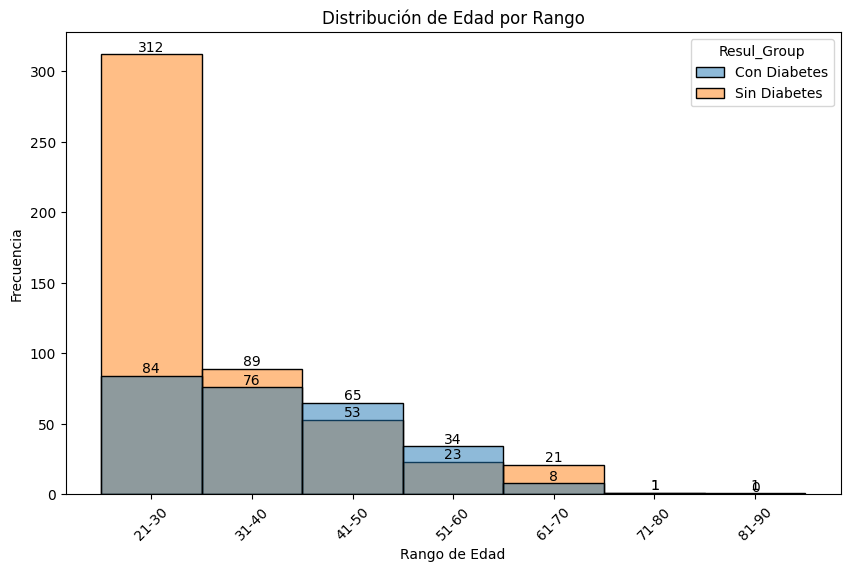

In [ ]:

# Definir los límites manualmente
bins = [21, 30, 40, 50, 60, 70, 80, 90]

# Asignamos las etiquetas para cada intervalo
labelsEdad = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90"]


# Crear una nueva columna en el DataFrame que categorice la edad en estos rangos
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labelsEdad, right=False)

# Reemplazar los valores de "Outcome" directamente con "No Diabetes" y "Diabetes"
df['Resul_Group'] = df['Outcome'].replace({0: 'Sin Diabetes', 1: 'Con Diabetes'})

# Graficar el histograma, utilizando la nueva columna 'Resul_Group' para el hue
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="Age_Group", stat="count", discrete=True, hue='Resul_Group')

# Título y etiquetas
plt.title("Distribución de Edad por Rango")
plt.xlabel("Rango de Edad")
plt.ylabel("Frecuencia")

# Agregar las frecuencias encima de cada barra
for container in ax.containers:
    ax.bar_label(container)

# Rotar las etiquetas para mejor legibilidad
plt.xticks(rotation=45)


# Mostrar gráfico
plt.show()

Observamos analíticamente las cantidades agrupadas del campo "Age", que existen en la nueva columna "Age_Group".

In [ ]:
df["Age_Group"].value_counts()

,count
Age_Group,
21-30,396
31-40,165
41-50,118
51-60,57
61-70,29
71-80,2
81-90,1


#Observamos 3 cosas:
 1. Una mayor cantidad de casos con Edades entre 21 y 30 años (396 casos) lo que representa un 51,5% del total. Sin embargo, solo el 33,3% tienen diabetes.
 2. Si nos centramos en la cantidad de casos con diabetes, en la muestra que tenemos dentro del rango de edad entre 31 y 40 años (165 casos), el 46% tiene diabetes.
 3. Mientras que en las muestras de los grupos entre 41 a 50 (55% con diabetes) y 51 a 60 años (59,6% con diabetes), ambos superan el 50% de casos positivos.


Ahora veremos el campo "BloodPressure" (Presion Arterial), usando un gráfico de *boxplot*, donde lo relacionaremos con el campos "Age (edad).
Ademas, Categorizaremos por el campo "Outcome" y de ese modo poder diferenciar entre los grupos con diabetes y sin diabetes.

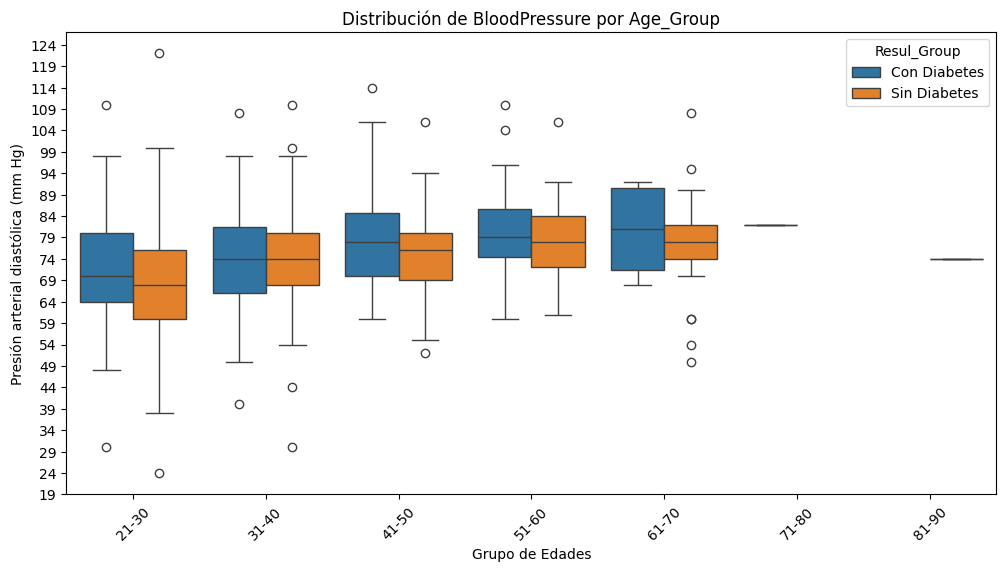

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age_Group', y="BloodPressure",hue='Resul_Group')
plt.title('Distribución de BloodPressure por Age_Group')
plt.xlabel('Grupo de Edades')
plt.ylabel('Presión arterial diastólica (mm Hg)')

# Modificar los valores del eje Y para segmentarlo en intervalos de 5
plt.yticks(range(int(df['BloodPressure'].min())-5, int(df['BloodPressure'].max())+5, 5))

# Rotar las etiquetas para mejor legibilidad
plt.xticks(rotation=45)
plt.show()

Observamos los valores estadísticos del campo "BloodPressure", con el metodo describe()

In [ ]:
df.BloodPressure.describe().round(0)

,BloodPressure
count,733.0
mean,72.0
std,12.0
min,24.0
25%,64.0
50%,72.0
75%,80.0
max,122.0


Observamos los valores Min,Max y Media del campo "BloodPressure"

In [ ]:
ValorPresionMin=df.BloodPressure.min()
ValorPresionMax=df.BloodPressure.max()
ValorPresionMedio=df.BloodPressure.mean().round(2)
print("Presion Min: ",ValorPresionMin)
print("Presion Max: ",ValorPresionMax)
print("Presion Promedio: ",ValorPresionMedio)


Presion Min:  0
Presion Max:  122
Presion Promedio:  69.11


Al ver que tenemos campos en 0 en el campo "BloodPresure", buscamos cuantificarlos

In [ ]:
presionEnCero = (df["BloodPressure"] == 0).sum() # Devuelve un entero que indica la cantidad de veces que BloodPressure es 0.
presionEnCero

np.int64(35)

Filtramos estos 35 casos que tienen en el campo BloodPressure (presion arterial) en Cero.

In [ ]:
df_presionMayorCero=df[df["BloodPressure"]>0] #Devuelve un DataFrame con las filas donde BloodPressure es 0.
df_presionMayorCero

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Tomando el nuevo DataFrame con los registros en 0 fitlrados del campo "BloodPressure", realizamos nuevamente un control del Min, Max y Media, de dicho campo.

In [ ]:
PresionMin=df_presionMayorCero['BloodPressure'].min()
PresionMax=df_presionMayorCero['BloodPressure'].max()
PresionMedia=df_presionMayorCero['BloodPressure'].mean().round(2)

print('PresionMedia',PresionMedia)

print('PresionMin',PresionMin)

print('PresionMax',PresionMax)


PresionMedia 72.41
PresionMin 24
PresionMax 122


Ahora Volvemos a medir la cantidad que tenemos en cada valor del campo "Outcome"

In [ ]:
df_presionMayorCero['Outcome'].value_counts(dropna=False) # mostrará la cantidad de cada valor en la columna, incluidas las entradas NaN (valores faltantes) o cualquier otro valor inusual.


Outcome
0    481
1    252
Name: count, dtype: int64

Realizamos una grafica donde realizamos agrupamientos según la edad

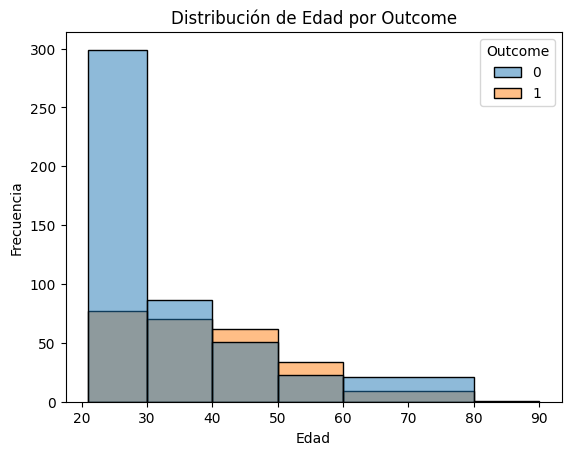

In [ ]:
bins=[21,30,40,50,60,80,90]
sns.histplot(data=df_presionMayorCero, x="Age", hue="Outcome", bins=bins)
plt.title("Distribución de Edad por Outcome")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

Realizamos una Grafica para comparar Edad vs DiabetesPedigreeFunction (Menores de 40 años)

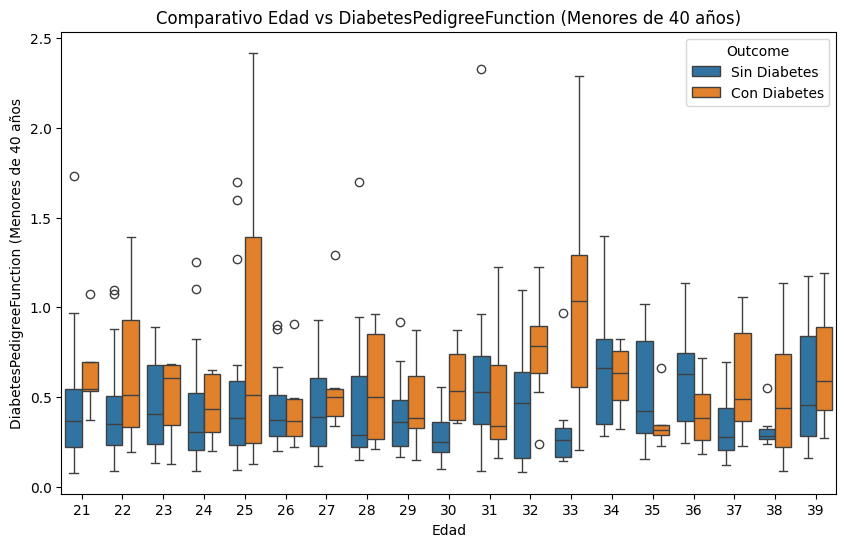

In [ ]:
# Filtrar el DataFrame para incluir solo personas menores de 40 años
df_menores_40 = df_presionMayorCero[df_presionMayorCero['Age'] < 40]

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='DiabetesPedigreeFunction', hue='Outcome', data=df_menores_40)
plt.title('Comparativo Edad vs DiabetesPedigreeFunction (Menores de 40 años)')
plt.ylabel('DiabetesPedigreeFunction')
plt.xlabel('Edad')

# Cambiar los valores en la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Con Diabetes' if label == '1' else 'Sin Diabetes' for label in labels]
plt.legend(handles, labels, title='Outcome')

plt.show()

Realizamos una Grafica para comparar Edad vs DiabetesPedigreeFunction (de 40 años o mas y menores a 60 años)

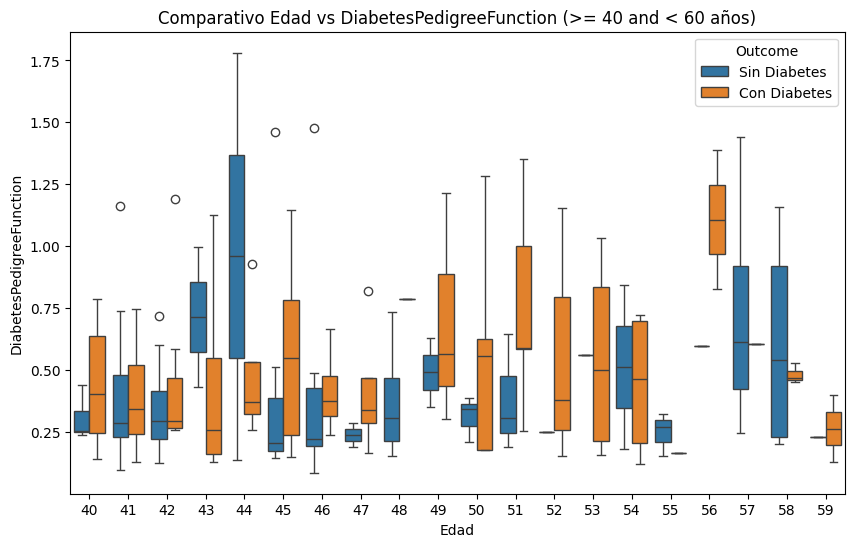

In [ ]:
# Filtrar el DataFrame para incluir solo personas mayores de 40 años y menores de 60 años
df_Mayores_40 = df_presionMayorCero[(df_presionMayorCero['Age'] >= 40) & (df_presionMayorCero['Age'] < 60)]

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='DiabetesPedigreeFunction', hue='Outcome', data=df_Mayores_40)
plt.title('Comparativo Edad vs DiabetesPedigreeFunction (>= 40 and < 60 años)')
plt.ylabel('DiabetesPedigreeFunction')
plt.xlabel('Edad')

# Cambiar los valores en la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Con Diabetes' if label == '1' else 'Sin Diabetes' for label in labels]
plt.legend(handles, labels, title='Outcome')

plt.show()

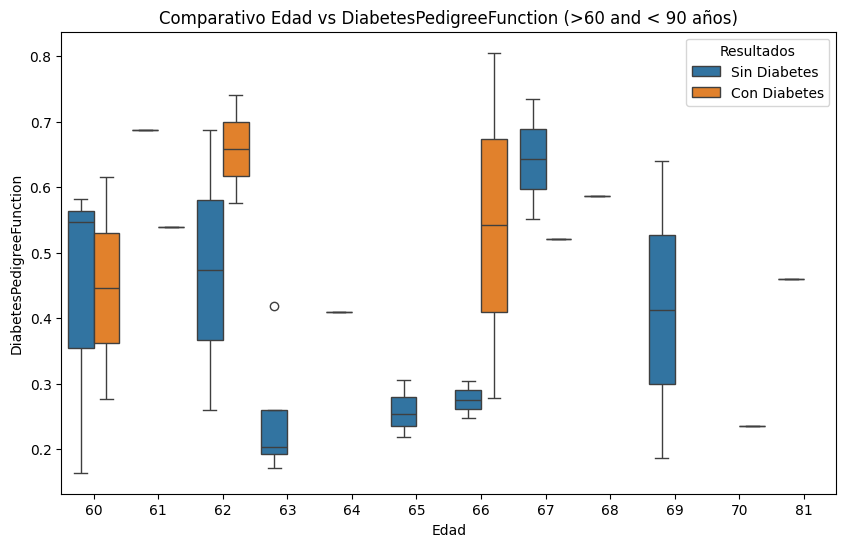

In [ ]:
# Filtrar el DataFrame para incluir solo personas mayores de 60 años y menores de 90 años
df_Mayores_60 = df_presionMayorCero[(df_presionMayorCero['Age'] >= 60) & (df_presionMayorCero['Age'] < 90)]

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='DiabetesPedigreeFunction', hue='Outcome', data=df_Mayores_60)
plt.title('Comparativo Edad vs DiabetesPedigreeFunction (>60 and < 90 años)')
plt.ylabel('DiabetesPedigreeFunction')
plt.xlabel('Edad')

# Cambiar los valores en la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Con Diabetes' if label == '1' else 'Sin Diabetes' for label in labels]
plt.legend(handles, labels, title='Resultados')

plt.show()

Verificamos los valores Min,Max y Media del campo "DiabetesPedigreeFunction"

In [ ]:

diabetesPedigreeFunctionMax=df_presionMayorCero.DiabetesPedigreeFunction.max()
diabetesPedigreeFunctionMin=df_presionMayorCero.DiabetesPedigreeFunction.min()
diabetesPedigreeFunctionPromedio= df_presionMayorCero.DiabetesPedigreeFunction.mean().round(2)
print('valor Max: ', diabetesPedigreeFunctionMax)
print('valor Min: ', diabetesPedigreeFunctionMin)
print('valor Promedio: ', diabetesPedigreeFunctionPromedio)

valor Max:  2.42
valor Min:  0.078
valor Promedio:  0.48


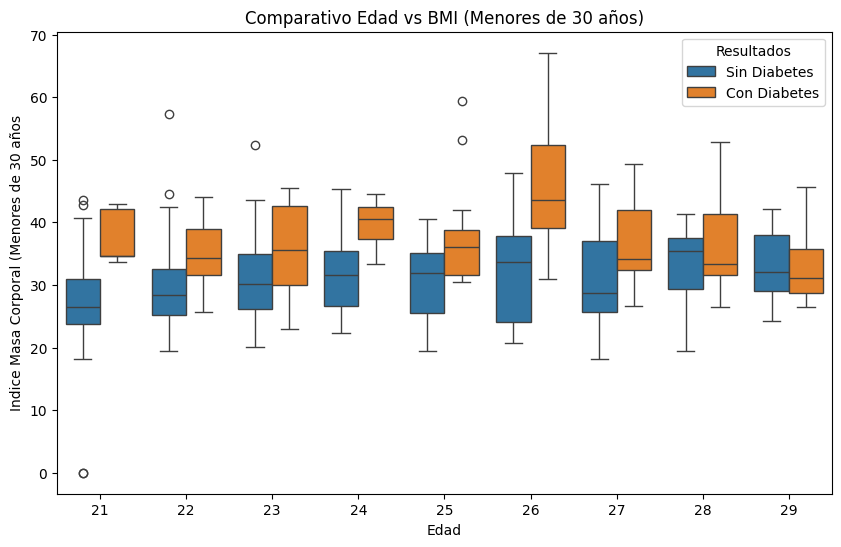

In [ ]:

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='BMI', hue='Outcome', data=df_menores_30)
plt.title('Comparativo Edad vs BMI (Menores de 30 años)')
plt.ylabel('Indice Masa Corporal (Menores de 30 años')
plt.xlabel('Edad')

# Cambiar los valores en la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Con Diabetes' if label == '1' else 'Sin Diabetes' for label in labels]
plt.legend(handles, labels, title='Resultados')

plt.show()

In [ ]:
df_menores_30.Glucose.mean().round(2)

np.float64(113.99)

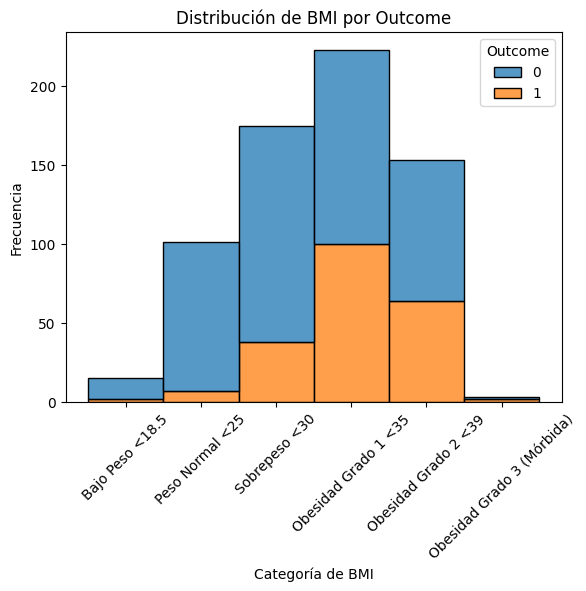

In [ ]:


# Definir los límites y etiquetas de las categorías para BMI
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 40]  # Asegúrate de que estos límites sean adecuados
labels = ['Bajo Peso <18.5', 'Peso Normal <25', 'Sobrepeso <30', 'Obesidad Grado 1 <35', 'Obesidad Grado 2 <39', 'Obesidad Grado 3 (Mórbida)']

# Agrupar los BMI en categorías
df['Categoría'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

# Graficar la distribución de categorías por Outcome
sns.histplot(data=df, x='Categoría', hue='Outcome', multiple='stack', stat='count')
plt.title("Distribución de BMI por Outcome")
plt.xlabel("Categoría de BMI")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()


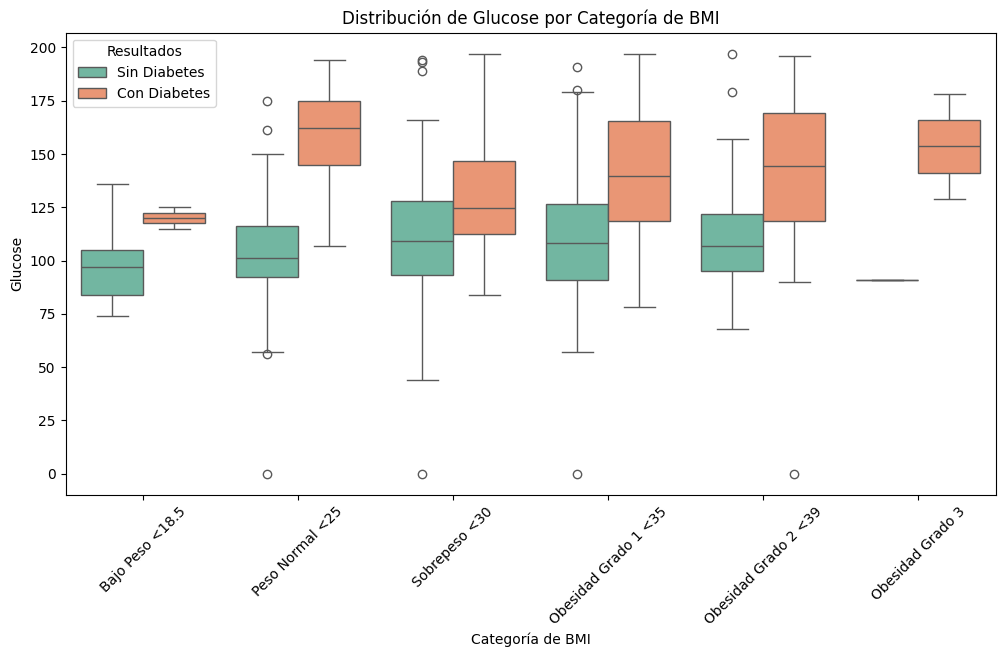

In [ ]:
# Definir los límites y etiquetas de las categorías para BMI
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 40]  # Asegúrate de que estos límites sean adecuados
labels = ['Bajo Peso <18.5', 'Peso Normal <25', 'Sobrepeso <30', 'Obesidad Grado 1 <35', 'Obesidad Grado 2 <39', 'Obesidad Grado 3']

# Agrupar los BMI en categorías
df['Categoría'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

# Crear el boxplot
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
sns.boxplot(data=df, x='Categoría', y='Glucose', hue='Outcome', palette='Set2')
plt.title("Distribución de Glucose por Categoría de BMI")
plt.xlabel("Categoría de BMI")
plt.ylabel("Glucose")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

# Cambiar los valores en la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Con Diabetes' if label == '1' else 'Sin Diabetes' for label in labels]
plt.legend(handles, labels, title='Resultados')

plt.show()


In [ ]:
valorMedio_Emb=df.Pregnancies.mean().round(2)
valorMin_Emb=df.Pregnancies.min()
valorMax_Emb=df.Pregnancies.max()

print('ValorMedio_Emb',valorMedio_Emb)
print('ValorMin_Emb',valorMin_Emb)
print('ValorMax_Emb',valorMax_Emb)

ValorMedio_Emb 3.85
ValorMin_Emb 0
ValorMax_Emb 17


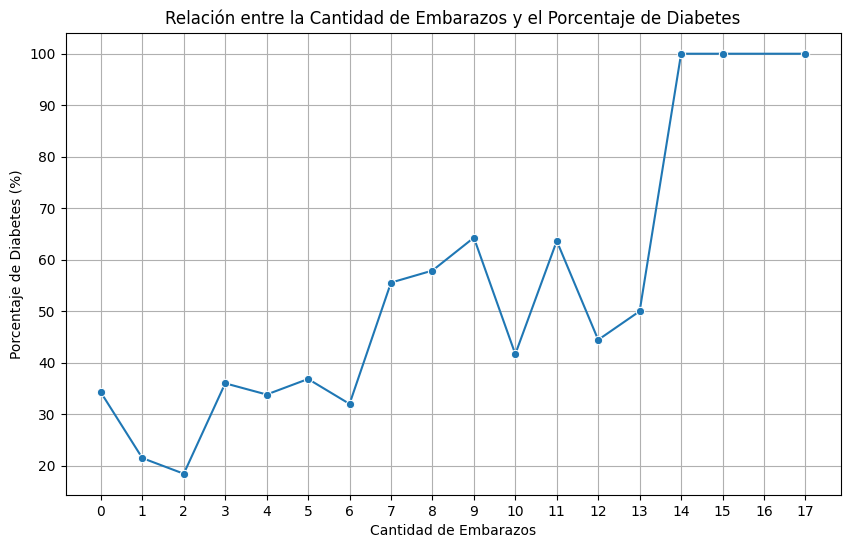

In [ ]:

# Agrupar por el número de embarazos y calcular el porcentaje de diabetes
grouped_data = df.groupby('Pregnancies')['Outcome'].mean().reset_index()
grouped_data['Diabetes Percentage'] = grouped_data['Outcome'] * 100

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='Pregnancies', y='Diabetes Percentage', marker='o')
plt.title('Relación entre la Cantidad de Embarazos y el Porcentaje de Diabetes')
plt.xlabel('Cantidad de Embarazos')
plt.ylabel('Porcentaje de Diabetes (%)')
plt.xticks(range(0, grouped_data['Pregnancies'].max() + 1))  # Mostrar todos los valores de embarazos
plt.grid()
plt.show()


C:\Users\Gabi\AppData\Local\Temp\ipykernel_13244\2770969840.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Pregnancies', 'Age Group'])['Outcome'].mean().reset_index()
C:\Users\Gabi\AppData\Local\Temp\ipykernel_13244\2770969840.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, x='Pregnancies', y='Diabetes Percentage', hue='Age Group', ci=None)


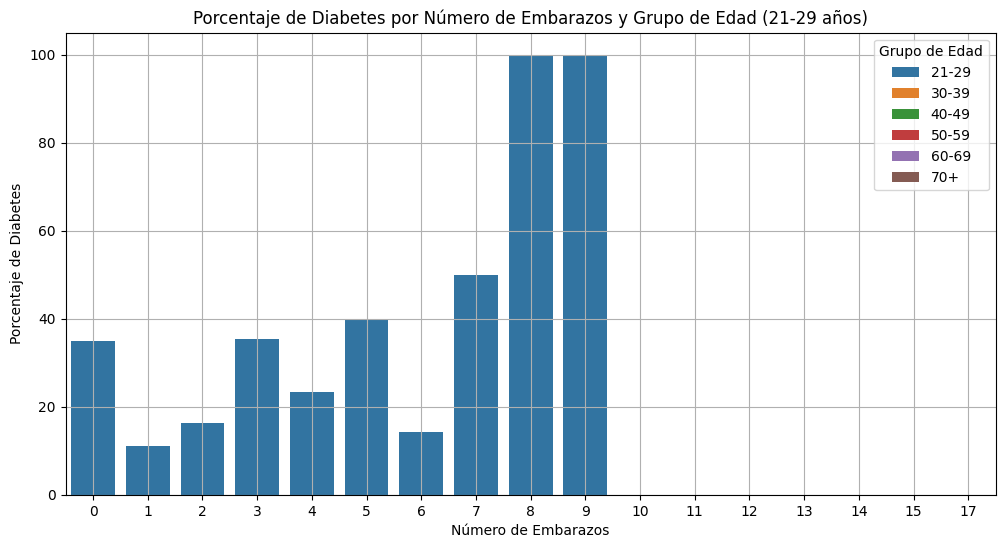

In [ ]:
# Primero, definimos los grupos de edad sin filtrar los datos.
bins = [21, 29, 39, 49, 59, 69, 100]  # Límites de edad
labels = ['21-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Agrupamos por 'Pregnancies' y 'Age Group', y calculamos el promedio de 'Outcome'.
grouped_data = df.groupby(['Pregnancies', 'Age Group'])['Outcome'].mean().reset_index()

# Calculamos el porcentaje de diabetes.
grouped_data['Diabetes Percentage'] = grouped_data['Outcome'] * 100

# Filtramos solo los grupos de edad que queremos mostrar, por ejemplo, los de 21-29
filtered_data = grouped_data[grouped_data['Age Group'].isin(['21-29'])]

# Visualizamos los resultados con un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='Pregnancies', y='Diabetes Percentage', hue='Age Group', ci=None)
plt.title('Porcentaje de Diabetes por Número de Embarazos y Grupo de Edad (21-29 años)')
plt.ylabel('Porcentaje de Diabetes')
plt.xlabel('Número de Embarazos')
plt.legend(title='Grupo de Edad')
plt.grid()
plt.show()
